<span style="color:pink; font-size:40px;">Part 1:Data manipulation</span>

- step1: import data
- 2: check missing value
- 3: eda
- 4: merge
- handle missing value( one hot encoder)
- auto correction
- time series group split
- val/ train (cross validation)
- choose model
- turn model
- interpret


In [66]:
import os
os.makedirs("figures", exist_ok=True)

In [1]:
import os
import math
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df_feature=pd.read_csv("/features.csv")
df_stores=pd.read_csv("/stores.csv")
df_train=pd.read_csv("/train.csv")
df_test=pd.read_csv("/test.csv")


## check duplicate value

In [ ]:
df_feature.duplicated(subset=['Store','Date','IsHoliday']).sum()

np.int64(0)

### exploring feature.csv

In [ ]:
print("shape of this dataset:",df_feature.shape)

shape of this dataset: (8190, 12)


In [ ]:
df_feature.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [ ]:
print(df_feature.columns)

Index(['Store', 'Date', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment',
       'IsHoliday'],
      dtype='object')


In [ ]:
print(df_feature.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB
None


In [ ]:
print(df_feature.describe())

             Store  Temperature   Fuel_Price      MarkDown1      MarkDown2  \
count  8190.000000  8190.000000  8190.000000    4032.000000    2921.000000   
mean     23.000000    59.356198     3.405992    7032.371786    3384.176594   
std      12.987966    18.678607     0.431337    9262.747448    8793.583016   
min       1.000000    -7.290000     2.472000   -2781.450000    -265.760000   
25%      12.000000    45.902500     3.041000    1577.532500      68.880000   
50%      23.000000    60.710000     3.513000    4743.580000     364.570000   
75%      34.000000    73.880000     3.743000    8923.310000    2153.350000   
max      45.000000   101.950000     4.468000  103184.980000  104519.540000   

           MarkDown3     MarkDown4      MarkDown5          CPI  Unemployment  
count    3613.000000   3464.000000    4050.000000  7605.000000   7605.000000  
mean     1760.100180   3292.935886    4132.216422   172.460809      7.826821  
std     11276.462208   6792.329861   13086.690278    39.7383

In [ ]:
print(df_feature.describe(include='object'))

              Date
count         8190
unique         182
top     2010-02-05
freq            45


In [ ]:
# check missing value
print(df_feature.isnull().sum())

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64


In [ ]:
# Number of rows (data points) that contain at least one missing value
num_rows_with_missing = df_feature.isnull().any(axis=1).sum()

# Fraction of rows (data points) with missing values
frac_rows_with_missing = num_rows_with_missing / len(df_feature)

# Number of features (columns) that contain missing values
num_features_with_missing = df_feature.isnull().any().sum()

# Fraction of features with missing values
frac_features_with_missing = num_features_with_missing / df_feature.shape[1]

print(f"Fraction of data points with missing values: {frac_rows_with_missing:.2%}")
print(f"Fraction of features with missing values: {frac_features_with_missing:.2%}")


Fraction of data points with missing values: 74.74%
Fraction of features with missing values: 58.33%


In [ ]:
# number of unique value
df_feature.nunique()

,0
Store,45
Date,182
Temperature,4178
Fuel_Price,1011
MarkDown1,4023
MarkDown2,2715
MarkDown3,2885
MarkDown4,3405
MarkDown5,4045
CPI,2505


### exploring train and stores dataset

In [ ]:
# shape of stores dataset
print(df_stores.shape)

(45, 3)


In [ ]:
# shape of train dataset
print(df_train.shape)

(421570, 5)


In [ ]:
# check missing value in stores
print(df_stores.isnull().sum())

Store    0
Type     0
Size     0
dtype: int64


In [ ]:
# check missing value in train dataset
print(df_train.isnull().sum())

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64


## Merge dataset to get final train/val dataset

In [5]:
df_final=df_train.merge(df_stores,how='left',on='Store').merge(df_feature,how='left',on=['Store','Date','IsHoliday'])


In [6]:
print(df_final.columns)

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Type', 'Size',
       'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3',
       'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment'],
      dtype='object')


In [7]:
# sort data by Store, Dept,Date(ASC)
df_final = df_final.sort_values(['Store', 'Dept', 'Date']).reset_index(drop=True)


In [8]:
print(df_final["Weekly_Sales"].isna().sum())

0


In [9]:
print(df_final.isnull().sum())

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Type                 0
Size                 0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
dtype: int64


## Merge dataset to get final test dataset

In [10]:
df_final_test=df_test.merge(df_stores,how='left',on='Store').merge(df_feature,how='left',on=['Store','Date','IsHoliday'])

In [11]:
print(df_final_test.shape)

(115064, 15)


In [12]:
print(df_test.shape)

(115064, 4)


In [13]:
print(df_final_test.isnull().sum())

Store               0
Dept                0
Date                0
IsHoliday           0
Type                0
Size                0
Temperature         0
Fuel_Price          0
MarkDown1         149
MarkDown2       28627
MarkDown3        9829
MarkDown4       12888
MarkDown5           0
CPI             38162
Unemployment    38162
dtype: int64


<span style="color:pink; font-size:40px;">Part 2:EDA</span>

## Need to do next step:
- log transformation on weekly sales


### Distribution of weekly_sales(traget variable)

/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


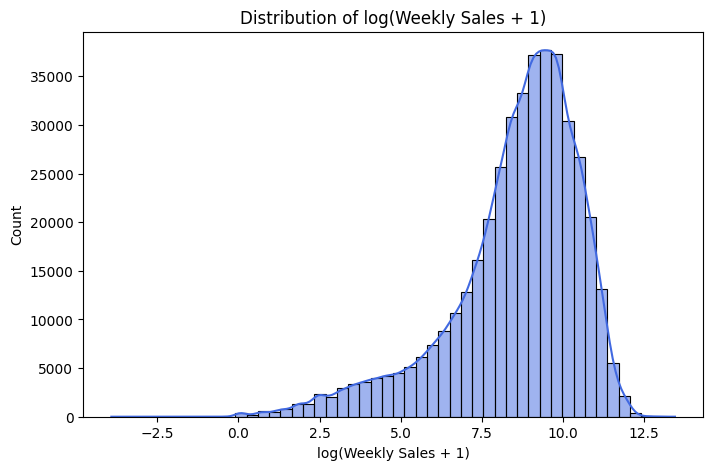

In [70]:
plt.figure(figsize=(8,5))
sns.histplot(np.log1p(df_final['Weekly_Sales']), bins=50, kde=True, color='royalblue')
plt.title('Distribution of log(Weekly Sales + 1)')
plt.xlabel('log(Weekly Sales + 1)')
plt.ylabel('Count')
plt.savefig(
    "figures/log_weekly_sales_distribution.png",
    dpi=300,
    bbox_inches="tight"
)
plt.show()
plt.close()


<span style="color:red">This plot shows that the original distribution of Weekly Sales was highly right-skewed, so I applied a log transformation, which made it approximately bell-shaped.</span>

### Weekly sales Over Time

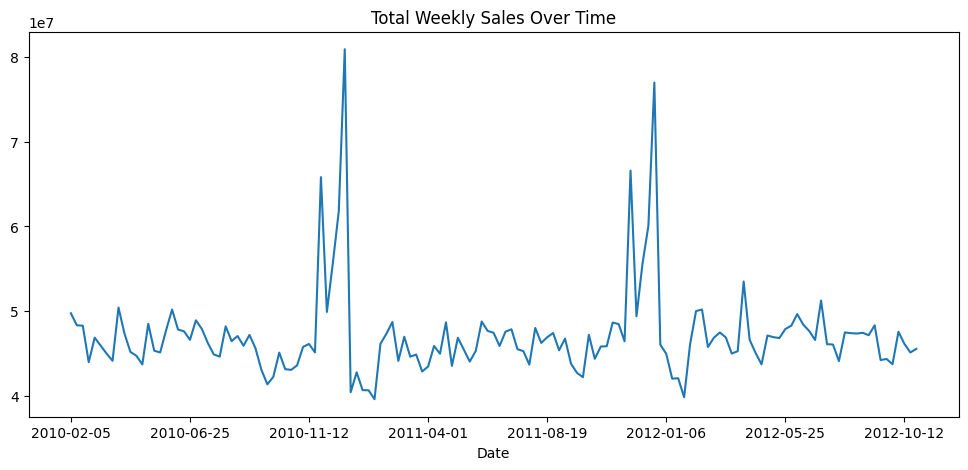

In [97]:
df_final.groupby('Date')['Weekly_Sales'].sum().plot(figsize=(12,5))
plt.title('Total Weekly Sales Over Time')
plt.savefig(
    "figures/sales_overtime.png",
    dpi=300,
    bbox_inches="tight"
)

plt.show()
plt.close()

### Count holiday for each month

In [ ]:
df_final['Date'] = pd.to_datetime(df_final['Date'])


df_final['Month'] = df_final['Date'].dt.month


holiday_counts = df_final[df_final['IsHoliday'] == True]['Month'].value_counts().sort_index()
print(holiday_counts)


Month
2     8895
9     8861
11    5959
12    5946
Name: count, dtype: int64


<span style="color:red">We can see that sales are noticeably higher during holiday weeks, especially around Christmas.</span>

### weekly sale VS. IsHoliday

/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/tmp/ipython-input-807294079.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


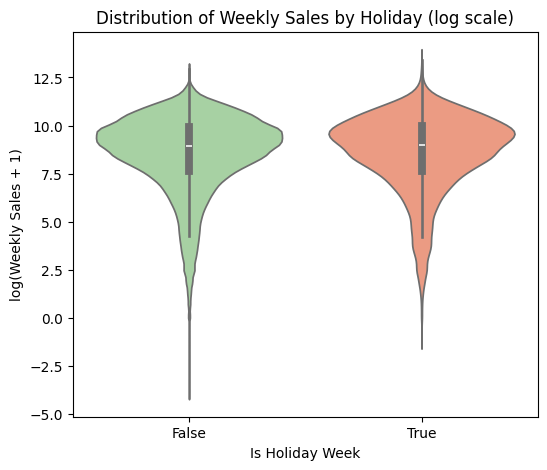

In [71]:
plt.figure(figsize=(6,5))
sns.violinplot(
    data=df_final,
    x='IsHoliday',
    y=np.log1p(df_final['Weekly_Sales']),
    inner='box',
    palette=['#A1D99B', '#FC9272']
)
plt.title('Distribution of Weekly Sales by Holiday (log scale)', fontsize=12)
plt.xlabel('Is Holiday Week')
plt.ylabel('log(Weekly Sales + 1)')
plt.savefig(
    "figures/dist_sales_byHoliday.png",
    dpi=300,
    bbox_inches="tight"
)
plt.show()
plt.close()



<span style="color:red">Holiday weeks generally show higher overall sales, with greater variability across stores and departments — some see significant spikes in sales.</span>
- This variability may related to markdown1-5

### Temperature VS. weekly_sale

/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


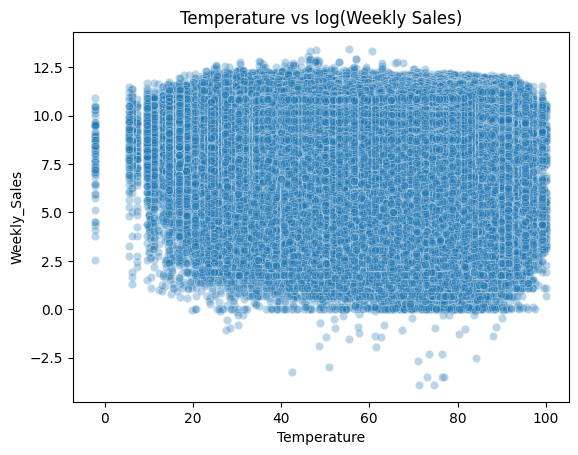

In [72]:
sns.scatterplot(data=df_final, x='Temperature', y=np.log1p(df_final['Weekly_Sales']), alpha=0.3)
plt.title('Temperature vs log(Weekly Sales)')
plt.savefig(
    "figures/temp_vs_sales.png",
    dpi=300,
    bbox_inches="tight"
)
plt.show()
plt.close()



<span style="color:red">The overall impact of temperature on sales appears weak or non-linear, with slightly lower sales observed during cold periods (below 20°F).</span>


### Fuel_Price VS. Weekly_Sales

/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


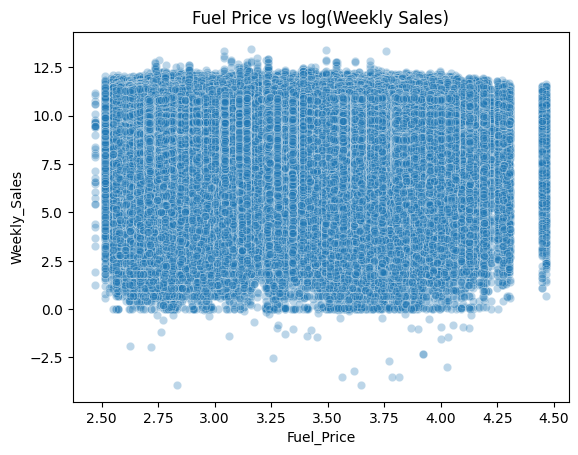

In [73]:
sns.scatterplot(data=df_final, x='Fuel_Price', y=np.log1p(df_final['Weekly_Sales']), alpha=0.3)
plt.title('Fuel Price vs log(Weekly Sales)')
plt.savefig(
    "figures/fuelprice_slaes.png",
    dpi=300,
    bbox_inches="tight"
)
plt.show()
plt.close()



### Store level mean sales

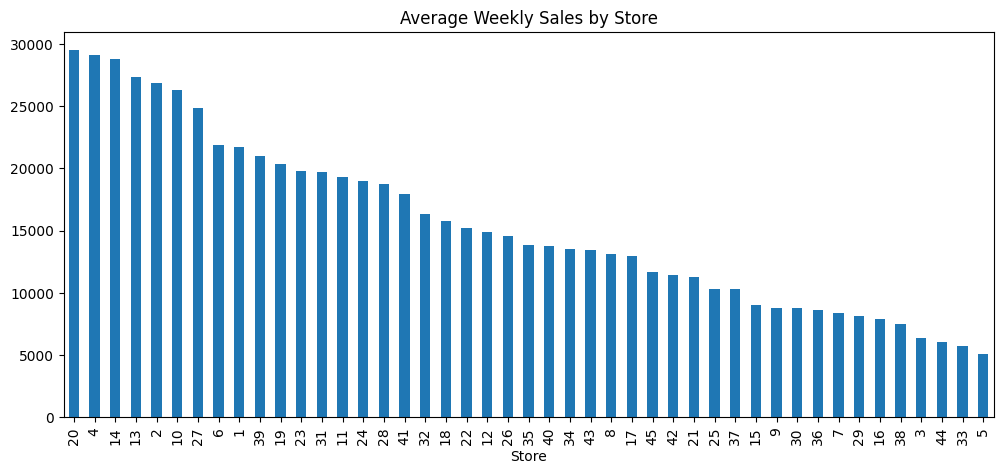

In [74]:
store_sales = df_final.groupby('Store')['Weekly_Sales'].mean().sort_values(ascending=False)
store_sales.plot(kind='bar', figsize=(12,5))
plt.title('Average Weekly Sales by Store')
plt.savefig(
    "figures/avgsales_bystore.png",
    dpi=300,
    bbox_inches="tight"
)
plt.show()
plt.close()



### Store type and size VS. Weekly_Sales

/tmp/ipython-input-2001973235.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_final, x='Type', y='Size', palette=['#A1D99B', '#9ECAE1', '#FC9272'])


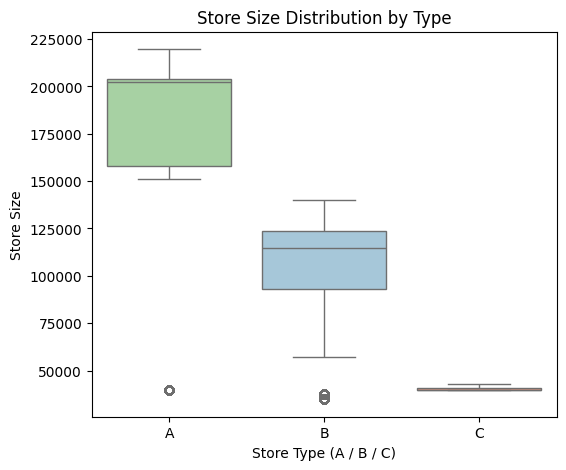

In [75]:
# Type vs. Size
plt.figure(figsize=(6,5))
sns.boxplot(data=df_final, x='Type', y='Size', palette=['#A1D99B', '#9ECAE1', '#FC9272'])
plt.title('Store Size Distribution by Type')
plt.xlabel('Store Type (A / B / C)')
plt.ylabel('Store Size')
plt.savefig(
    "figures/dist_storesize.png",
    dpi=300,
    bbox_inches="tight"
)
plt.show()
plt.close()



/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/tmp/ipython-input-2007197954.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


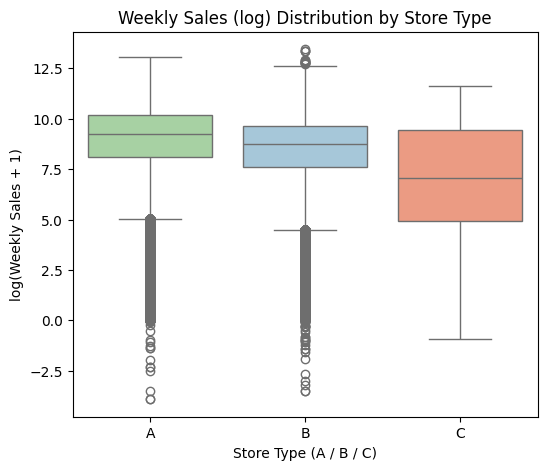

In [76]:
#Type vs Weeky _Sale
plt.figure(figsize=(6,5))
sns.boxplot(
    data=df_final,
    x='Type',
    y=np.log1p(df_final['Weekly_Sales']),
    palette=['#A1D99B', '#9ECAE1', '#FC9272']
)
plt.title('Weekly Sales (log) Distribution by Store Type')
plt.xlabel('Store Type (A / B / C)')
plt.ylabel('log(Weekly Sales + 1)')
plt.savefig(
    "figures/dist_bystoretype.png",
    dpi=300,
    bbox_inches="tight"
)
plt.show()
plt.close()



### Dept level analysis

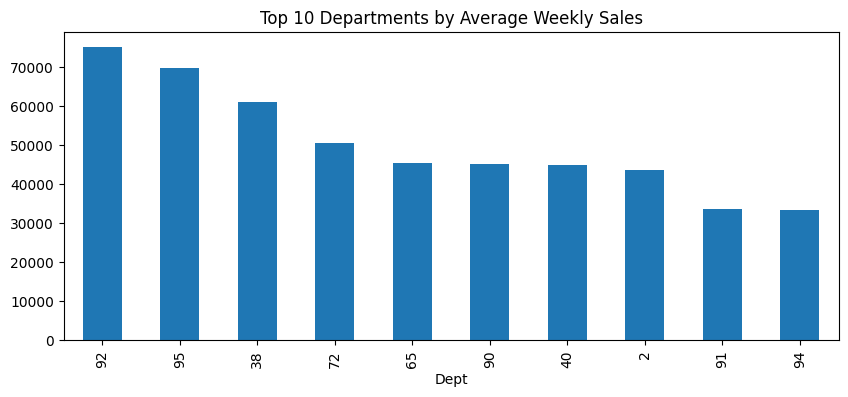

In [77]:
dept_sales = df_final.groupby('Dept')['Weekly_Sales'].mean().sort_values(ascending=False).head(10)
dept_sales.plot(kind='bar', figsize=(10,4))
plt.title('Top 10 Departments by Average Weekly Sales')
plt.savefig(
    "figures/top_10.png",
    dpi=300,
    bbox_inches="tight"
)
plt.show()
plt.close()


### feature correlation

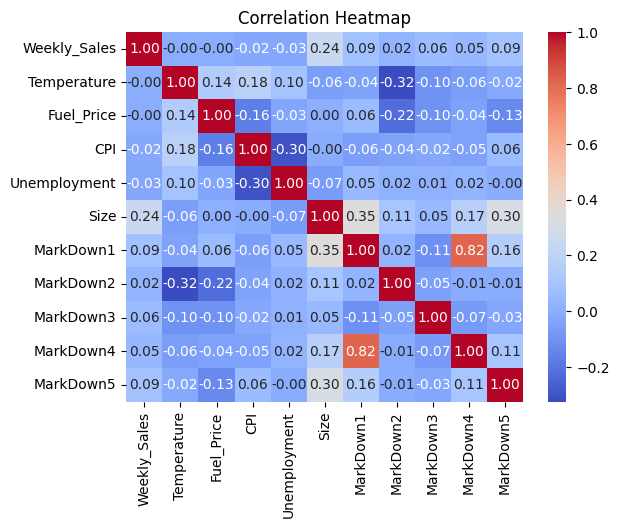

In [78]:
num_cols = ['Weekly_Sales','Temperature','Fuel_Price','CPI','Unemployment','Size','MarkDown1', 'MarkDown2', 'MarkDown3',
       'MarkDown4', 'MarkDown5']
sns.heatmap(df_final[num_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.savefig(
    "figures/corr_heatmap.png",
    dpi=300,
    bbox_inches="tight"
)
plt.show()
plt.close()



<span style="color:red">No clear linear relationship between features</span>

<span style="color:pink; font-size:40px;">Part 3:Split Data- Time Series Group wise</span>

In [14]:
print(df_final.isnull().sum())

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Type                 0
Size                 0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
dtype: int64


In [15]:
# create copy of df_final
import pandas as pd
df1=df_final.copy()
df1['Date']=pd.to_datetime(df1['Date'])

In [16]:
# create group (store+Dept)
df1['group']=df1['Store'].astype(str)+"_"+df1["Dept"].astype(str)

In [17]:
# sorted by time
df1 = df1.sort_values(["group", "Date"])

In [18]:




def split_7030(group):
    n = len(group)
    cut = int(n * 0.7)
    return group.iloc[:cut], group.iloc[cut:]

train_list, val_list = [], []

for _, g in df1.groupby("group"):
    tr, va = split_7030(g)
    train_list.append(tr)
    val_list.append(va)

train_df = pd.concat(train_list).reset_index(drop=True)
val_df   = pd.concat(val_list).reset_index(drop=True)


## check my split data set

In [ ]:
len(train_df)+len(val_df)==len(df1)

True

In [19]:
g = df1["group"].iloc[10]

print("TRAIN last date:", train_df[train_df["group"]==g]["Date"].max())
print("VAL first date :", val_df[val_df["group"]==g]["Date"].min())


TRAIN last date: 2011-12-30 00:00:00
VAL first date : 2012-01-06 00:00:00


In [20]:
check_ratio = (
    train_df.groupby("group").size() /
    df1.groupby("group").size()
)

check_ratio.describe()


,0
count,3294.000000
mean,0.693555
std,0.026472
min,0.500000
25%,0.699301
50%,0.699301
75%,0.699301
max,0.700000


In [21]:
train_max = train_df.groupby("group")["Date"].max()
val_min   = val_df.groupby("group")["Date"].min()

order_check = train_max.align(val_min, join="inner")[0] < train_max.align(val_min, join="inner")[1]
order_check.value_counts()

train_max, val_min = train_max.align(val_min, join="inner")

order_check = train_max < val_min
order_check.value_counts()


,count
Date,
True,3294


<span style="color:pink; font-size:40px;">Part 4: missing value/auto corrction(lag features)</span>

## Handle missing value

In [22]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd


markdown_cols = ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']


# -----------------------------
# Step 1: fit （only train）
# -----------------------------
def fit_imputers_and_encoder(train_df, group_col='group',
                             cpi_cols=['CPI', 'Unemployment'],
                             markdown_cols=markdown_cols):

    # ---- CPI & Unemployment median (per group) ----
    medians = {}
    for col in cpi_cols:
        medians[col] = train_df.groupby(group_col)[col].median()

    global_median = {col: train_df[col].median() for col in cpi_cols}

    # ---- Markdown: categorical Yes/No ----
    cat_cols = []
    for col in markdown_cols:
        if col in train_df.columns:
            train_df[col] = train_df[col].fillna(0)
            train_df[f"{col}_indicator"] = (train_df[col] != 0).astype(int)
            train_df[f"{col}_cat"] = train_df[col].apply(lambda x: "No" if x == 0 else "Yes")
            cat_cols.append(f"{col}_cat")

    # ---- Fit OneHotEncoder ONLY on train ----
    try:
        enc = OneHotEncoder(sparse=False, handle_unknown="ignore")
    except TypeError:
        enc = OneHotEncoder(sparse_output=False, handle_unknown="ignore")

    enc.fit(train_df[cat_cols])

    feature_names = list(enc.get_feature_names_out(cat_cols))


    return {
        "medians": medians,
        "global_median": global_median,
        "encoder": enc,
        "cat_cols": cat_cols,
        "markdown_cols": markdown_cols,
        "feature_names": feature_names
    }


# -----------------------------
# Step 2: transform （train / val / test ）
# -----------------------------
def transform_all(df, artifacts, group_col='group',
                  cpi_cols=['CPI', 'Unemployment']):

    df = df.copy()

    medians = artifacts["medians"]
    global_median = artifacts["global_median"]
    enc = artifacts["encoder"]
    cat_cols = artifacts["cat_cols"]
    markdown_cols = artifacts["markdown_cols"]
    feature_names = artifacts["feature_names"]

    # -------- CPI / Unemployment: forward fill + train median --------
    for col in cpi_cols:
        # forward fill only (no bfill!)
        df[col] = df.groupby(group_col)[col].ffill()
        # use TRAIN group median
        df[col] = df[col].fillna(df[group_col].map(medians[col]))
        # fallback global median (train)
        df[col] = df[col].fillna(global_median[col])

    # -------- Markdown: create indicator + cat --------
    for col in markdown_cols:
        if col in df.columns:
            df[col] = df[col].fillna(0)
            df[f"{col}_indicator"] = (df[col] != 0).astype(int)
            df[f"{col}_cat"] = df[col].apply(lambda x: "No" if x == 0 else "Yes")

    # -------- OneHot transform --------
    arr = enc.transform(df[cat_cols])
    df_enc = pd.DataFrame(arr, columns=feature_names, index=df.index).astype(int)
    df = pd.concat([df, df_enc], axis=1)

    # drop temp cat cols + raw markdown cols
    drop_cols = cat_cols + [col for col in markdown_cols if col in df.columns]
    df = df.drop(columns=drop_cols)

    return df


In [23]:
# fit only on TRAIN
artifacts = fit_imputers_and_encoder(train_df)

# transform ALL
train_df = transform_all(train_df, artifacts)
val_df   = transform_all(val_df, artifacts)



In [24]:
# Create 'group' column for df_final_test
df_final_test = df_final_test.copy()

df_final_test["group"] = df_final_test["Store"].astype(str) + "_" + df_final_test["Dept"].astype(str)

test_df  = transform_all(df_final_test, artifacts)

In [25]:
print("Train NaNs:", train_df.isnull().sum().sum())
print("Val NaNs:", val_df.isnull().sum().sum())
print("Test NaNs:", test_df.isnull().sum().sum())


Train NaNs: 0
Val NaNs: 0
Test NaNs: 0


In [26]:

train_df.isnull().sum().sort_values(ascending=False).head(15)


,0
Store,0
Dept,0
Date,0
Weekly_Sales,0
IsHoliday,0
Type,0
Size,0
Temperature,0
Fuel_Price,0
CPI,0


## Lag Feature( VAR(p))

In [27]:
print(train_df.columns)

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Type', 'Size',
       'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'group',
       'MarkDown1_indicator', 'MarkDown2_indicator', 'MarkDown3_indicator',
       'MarkDown4_indicator', 'MarkDown5_indicator', 'MarkDown1_cat_No',
       'MarkDown1_cat_Yes', 'MarkDown2_cat_No', 'MarkDown2_cat_Yes',
       'MarkDown3_cat_No', 'MarkDown3_cat_Yes', 'MarkDown4_cat_No',
       'MarkDown4_cat_Yes', 'MarkDown5_cat_No', 'MarkDown5_cat_Yes'],
      dtype='object')


In [28]:
target = "Weekly_Sales"
group_col = "group"
time_col = "Date"

# =========================
# 1. VAR(p) for CPI & Unemployment
# =========================
num_features = ["CPI", "Unemployment"]

def add_var_lags(df, p, group_col="group", time_col="Date", num_features=None):
    df = df.sort_values([group_col, time_col]).copy()
    lag_cols = num_features.copy()

    for col in lag_cols:
        for lag in range(1, p + 1):
            df[f"{col}_lag{lag}"] = df.groupby(group_col)[col].shift(lag)

    return df


p = 3
train_df1 = add_var_lags(train_df, p, num_features=num_features)
val_df1   = add_var_lags(val_df,   p, num_features=num_features)
test_df1  = add_var_lags(test_df,  p, num_features=num_features)


# =========================
# 2. Weekly_Sales lags + rolling (train / val ONLY)
# =========================
def add_sales_features(df):
    df = df.sort_values([group_col, time_col]).copy()

    # lags
    for lag in [1, 2, 52]:
        df[f"sales_lag{lag}"] = df.groupby(group_col)[target].shift(lag)

    # rolling means (shift first to avoid leakage)
    df["sales_roll4"]  = df.groupby(group_col)[target].shift(1).rolling(4).mean()
    df["sales_roll13"] = df.groupby(group_col)[target].shift(1).rolling(13).mean()

    return df


train_df1 = add_sales_features(train_df1)
val_df1   = add_sales_features(val_df1)
# test_df1 不加任何 sales 相关特征


# =========================
# 3. Temperature lags (ALL splits)
# =========================
def add_temp_lags(df):
    df = df.sort_values([group_col, time_col]).copy()

    df["temp_lag1"]  = df.groupby(group_col)["Temperature"].shift(1)
    df["temp_lag52"] = df.groupby(group_col)["Temperature"].shift(52)

    return df


train_df1 = add_temp_lags(train_df1)
val_df1   = add_temp_lags(val_df1)
test_df1  = add_temp_lags(test_df1)


# =========================
# 4. Indicator + fallback (ALL splits, ALL lag features)
# =========================
def add_indicator_and_fill(df):
    df = df.copy()


    lag_cols = [c for c in df.columns if "_lag" in c]

    for col in lag_cols:


        ind_col = "has_" + col
        df[ind_col] = df[col].notna().astype(int)

        # fallback

        if col == "sales_lag52":
            if "sales_roll13" in df.columns:
                df[col] = df[col].fillna(df["sales_roll13"])
            if "sales_lag2" in df.columns:
                df[col] = df[col].fillna(df["sales_lag2"])


        elif col == "temp_lag52":
            if "temp_lag1" in df.columns:
                df[col] = df[col].fillna(df["temp_lag1"])


        elif col.endswith("_lag2") or col.endswith("_lag3"):
            base = col.replace("_lag2", "_lag1").replace("_lag3", "_lag1")
            if base in df.columns:
                df[col] = df[col].fillna(df[base])



    return df


# Apply to ALL splits
train_df1 = add_indicator_and_fill(train_df1)
val_df1   = add_indicator_and_fill(val_df1)
test_df1  = add_indicator_and_fill(test_df1)


In [29]:
# =========================
# FINAL NA HANDLER
# =========================
def handle_na_features(train_df, val_df, test_df):

    # ========== 1. 处理 rolling（仅 train / val 才有） ==========
    for df in [train_df, val_df]:
        # rolling fallback -> 用 lag1 / lag2 填
        if "sales_roll4" in df.columns:
            df["sales_roll4"]  = df["sales_roll4"].fillna(df.get("sales_lag1"))
        if "sales_roll13" in df.columns:
            df["sales_roll13"] = df["sales_roll13"].fillna(df.get("sales_lag2"))

    # ========== 2. 修补 lag1（All splits） ==========
    for df in [train_df, val_df, test_df]:
        # CPI / Unemployment / Temperature 的 lag1 用当前值代替（安全）
        if "CPI_lag1" in df.columns:
            df["CPI_lag1"] = df["CPI_lag1"].fillna(df["CPI"])
        if "Unemployment_lag1" in df.columns:
            df["Unemployment_lag1"] = df["Unemployment_lag1"].fillna(df["Unemployment"])
        if "temp_lag1" in df.columns:
            df["temp_lag1"] = df["temp_lag1"].fillna(df["Temperature"])

    # ========== 3. 修补 lag2 / lag3 ==========
    for df in [train_df, val_df, test_df]:
        for col in df.columns:
            # *_lag2 → fallback 到 *_lag1
            if col.endswith("_lag2"):
                base = col.replace("_lag2", "_lag1")
                if base in df.columns:
                    df[col] = df[col].fillna(df[base])

            # *_lag3 → fallback 到 *_lag1
            if col.endswith("_lag3"):
                base = col.replace("_lag3", "_lag1")
                if base in df.columns:
                    df[col] = df[col].fillna(df[base])

    # ========== 4. sales_lag52 & temp_lag52 专属 fallback ==========
    for df in [train_df, val_df]:
        if "sales_lag52" in df.columns:
            df["sales_lag52"] = df["sales_lag52"].fillna(df.get("sales_roll13"))
            df["sales_lag52"] = df["sales_lag52"].fillna(df.get("sales_lag2"))

    for df in [train_df, val_df, test_df]:
        if "temp_lag52" in df.columns:
            df["temp_lag52"] = df["temp_lag52"].fillna(df.get("temp_lag1"))

    # ========== 5. 最终兜底：forward fill（按 group） ==========
    for df in [train_df, val_df, test_df]:
        df.sort_values(["group", "Date"], inplace=True)
        df.fillna(method="ffill", inplace=True)

    return train_df, val_df, test_df


In [30]:
train_df1, val_df1, test_df1 = handle_na_features(train_df1, val_df1, test_df1)


/tmp/ipython-input-1173279941.py:52: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method="ffill", inplace=True)
/tmp/ipython-input-1173279941.py:52: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method="ffill", inplace=True)
/tmp/ipython-input-1173279941.py:52: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method="ffill", inplace=True)


In [31]:
for name, df in [("train", train_df1), ("val", val_df1), ("test", test_df1)]:
    print(f"\n{name} has NA? ->", df.isna().values.any())



train has NA? -> True

val has NA? -> True

test has NA? -> False


In [32]:
for name, df in [("train_df1", train_df1), ("val_df1", val_df1), ("test_df1", test_df1)]:
    total_na = df.isna().sum().sum()
    print(f"{name}: total missing cells = {total_na}")


train_df1: total missing cells = 5
val_df1: total missing cells = 5
test_df1: total missing cells = 0


In [33]:
train_df1 = train_df1.fillna(0)
val_df1   = val_df1.fillna(0)


In [34]:
for name, df in [("train_df1", train_df1), ("val_df1", val_df1), ("test_df1", test_df1)]:
    total_na = df.isna().sum().sum()
    print(f"{name}: total missing cells = {total_na}")


train_df1: total missing cells = 0
val_df1: total missing cells = 0
test_df1: total missing cells = 0


In [35]:
print(test_df1.columns)

Index(['Store', 'Dept', 'Date', 'IsHoliday', 'Type', 'Size', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment', 'group', 'MarkDown1_indicator',
       'MarkDown2_indicator', 'MarkDown3_indicator', 'MarkDown4_indicator',
       'MarkDown5_indicator', 'MarkDown1_cat_No', 'MarkDown1_cat_Yes',
       'MarkDown2_cat_No', 'MarkDown2_cat_Yes', 'MarkDown3_cat_No',
       'MarkDown3_cat_Yes', 'MarkDown4_cat_No', 'MarkDown4_cat_Yes',
       'MarkDown5_cat_No', 'MarkDown5_cat_Yes', 'CPI_lag1', 'CPI_lag2',
       'CPI_lag3', 'Unemployment_lag1', 'Unemployment_lag2',
       'Unemployment_lag3', 'temp_lag1', 'temp_lag52', 'has_CPI_lag1',
       'has_CPI_lag2', 'has_CPI_lag3', 'has_Unemployment_lag1',
       'has_Unemployment_lag2', 'has_Unemployment_lag3', 'has_temp_lag1',
       'has_temp_lag52'],
      dtype='object')


## My final data set
- train_df1
- val_df1
- test_df1

In [ ]:
print(train_df1.columns)

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Type', 'Size',
       'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'group',
       'MarkDown1_indicator', 'MarkDown2_indicator', 'MarkDown3_indicator',
       'MarkDown4_indicator', 'MarkDown5_indicator', 'MarkDown1_cat_No',
       'MarkDown1_cat_Yes', 'MarkDown2_cat_No', 'MarkDown2_cat_Yes',
       'MarkDown3_cat_No', 'MarkDown3_cat_Yes', 'MarkDown4_cat_No',
       'MarkDown4_cat_Yes', 'MarkDown5_cat_No', 'MarkDown5_cat_Yes',
       'CPI_lag1', 'CPI_lag2', 'CPI_lag3', 'Unemployment_lag1',
       'Unemployment_lag2', 'Unemployment_lag3', 'sales_lag1', 'sales_lag2',
       'sales_lag52', 'sales_roll4', 'sales_roll13', 'temp_lag1', 'temp_lag52',
       'has_CPI_lag1', 'has_CPI_lag2', 'has_CPI_lag3', 'has_Unemployment_lag1',
       'has_Unemployment_lag2', 'has_Unemployment_lag3', 'has_sales_lag1',
       'has_sales_lag2', 'has_sales_lag52', 'has_temp_lag1', 'has_temp_lag52'],
      dtype='object')


## Preprocessing

In [36]:
for df in [train_df1, val_df1, test_df1]:
    df["Date_ordinal"] = pd.to_datetime(df["Date"]).map(pd.Timestamp.toordinal)


In [37]:
num_features = [
    "Size", "Temperature", "Fuel_Price", "CPI", "Unemployment",
    "CPI_lag1", "CPI_lag2", "CPI_lag3",
    "Unemployment_lag1", "Unemployment_lag2", "Unemployment_lag3",
    "sales_lag1", "sales_lag2", "sales_lag52",
    "sales_roll4", "sales_roll13",
    "temp_lag1", "temp_lag52"
]


In [38]:
cat_features = [
    "Store", "Dept", "IsHoliday", "Type", "group",

    "MarkDown1_indicator", "MarkDown2_indicator", "MarkDown3_indicator",
    "MarkDown4_indicator", "MarkDown5_indicator",

    "MarkDown1_cat_No", "MarkDown1_cat_Yes",
    "MarkDown2_cat_No", "MarkDown2_cat_Yes",
    "MarkDown3_cat_No", "MarkDown3_cat_Yes",
    "MarkDown4_cat_No", "MarkDown4_cat_Yes",
    "MarkDown5_cat_No", "MarkDown5_cat_Yes",

    "has_CPI_lag1", "has_CPI_lag2", "has_CPI_lag3",
    "has_Unemployment_lag1", "has_Unemployment_lag2", "has_Unemployment_lag3",
    "has_sales_lag1", "has_sales_lag2", "has_sales_lag52",
    "has_temp_lag1", "has_temp_lag52"
]
date_feature = ["Date_ordinal"]
drop_cols = ["Date"]



In [39]:
y_train = train_df1["Weekly_Sales"]
X_train = train_df1.drop(columns=["Weekly_Sales"] + drop_cols)

y_val = val_df1["Weekly_Sales"]
X_val = val_df1.drop(columns=["Weekly_Sales"] + drop_cols)

X_test = test_df1.drop(columns=drop_cols)


In [40]:

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore", sparse_output=False), cat_features),
        ("num", MinMaxScaler(), num_features)
    ],
    remainder="passthrough"
)


## Get Subset of data

In [59]:
assert "group" in X_train.columns
assert "group" in X_val.columns


In [60]:
import numpy as np

np.random.seed(42)


train_groups = X_train["group"].unique()


subtrain_groups = np.random.choice(
    train_groups,
    size=200,
    replace=False
)
mask_subtrain = X_train["group"].isin(subtrain_groups)

X_subtrain = X_train.loc[mask_subtrain].copy()
y_subtrain = y_train.loc[mask_subtrain].copy()


In [61]:
val_groups = X_val["group"].unique()


available_val_groups = np.setdiff1d(val_groups, subtrain_groups)


subval_groups = np.random.choice(
    available_val_groups,
    size=200,
    replace=False
)
mask_subval = X_val["group"].isin(subval_groups)

X_subval = X_val.loc[mask_subval].copy()
y_subval = y_val.loc[mask_subval].copy()


In [62]:
print("Subtrain groups:", X_subtrain["group"].nunique())
print("Subval groups:", X_subval["group"].nunique())


assert set(X_subtrain["group"].unique()).isdisjoint(
    set(X_subval["group"].unique())
)


Subtrain groups: 200
Subval groups: 200


## Baseline Model

In [ ]:
from sklearn.dummy import DummyRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

baseline = Pipeline([
    ("prep", preprocessor),
    ("model", DummyRegressor(strategy="mean"))
])

baseline.fit(X_train, y_train)
y_base = baseline.predict(X_val)

rmse_base = np.sqrt(mean_squared_error(y_val, y_base))
mse_base  = mean_squared_error(y_val, y_base)
r2_base   = r2_score(y_val, y_base)
amse_base = np.mean((y_val - y_base) ** 2)

print("=== BASELINE ===")
print("RMSE:", rmse_base)
print("MSE :", mse_base)
print("AMSE:", amse_base)
print("R2  :", r2_base)


=== BASELINE ===
RMSE: 22143.21884683051
MSE : 490322140.8986299
AMSE: 490322140.8986299
R2  : -0.00023315476002605529


## Linear Regression

In [109]:
import os
os.makedirs("results", exist_ok=True)


In [110]:
import joblib

In [94]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

linreg = Pipeline([
    ("prep", preprocessor),
    ("model", LinearRegression())
])

# fit on full train
linreg.fit(X_train, y_train)

# predict on val
y_pred = linreg.predict(X_val)

# metrics
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
mse  = mean_squared_error(y_val, y_pred)
amse = np.mean((y_val - y_pred) ** 2)
r2   = r2_score(y_val, y_pred)

print("=== LINEAR REGRESSION ===")
print("RMSE:", rmse)
print("MSE :", mse)
print("AMSE:", amse)
print("R2  :", r2)


=== LINEAR REGRESSION ===
RMSE: 4172.132564866562
MSE : 17406690.13882003
AMSE: 17406690.13882003
R2  : 0.9644912045791509


In [111]:
joblib.dump(linreg, "results/linear_regression_model.pkl")

['results/linear_regression_model.pkl']

True Vs. Predict

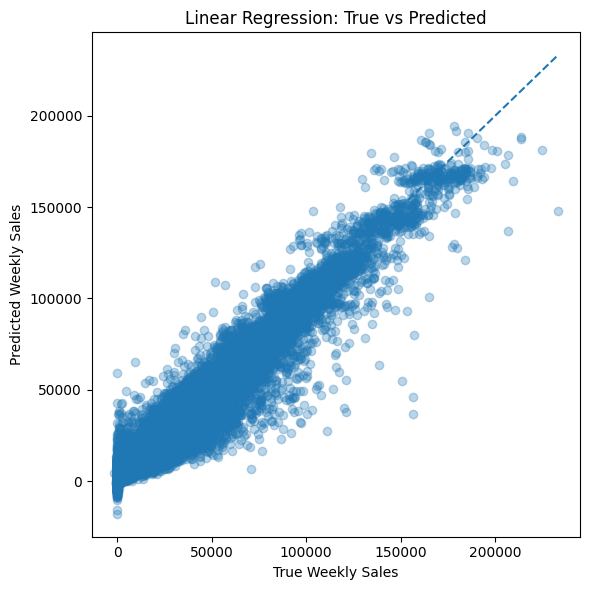

In [95]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
plt.scatter(y_val, y_pred, alpha=0.3)
plt.plot(
    [y_val.min(), y_val.max()],
    [y_val.min(), y_val.max()],
    linestyle="--"
)
plt.xlabel("True Weekly Sales")
plt.ylabel("Predicted Weekly Sales")
plt.title("Linear Regression: True vs Predicted")
plt.tight_layout()
plt.savefig(
    "figures/linearregression2_scatter.png",
    dpi=300,
    bbox_inches="tight"
)
plt.show()
plt.close()



Global Feature importance

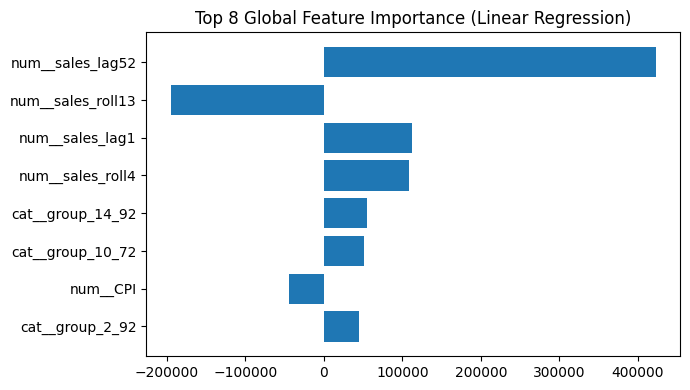

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# feature names from preprocessor
feature_names = linreg.named_steps["prep"].get_feature_names_out()

# coefficients
coef = linreg.named_steps["model"].coef_

fi_df = pd.DataFrame({
    "feature": feature_names,
    "coefficient": coef,
    "abs_coefficient": np.abs(coef)
}).sort_values("abs_coefficient", ascending=False)

# Top 8
top8 = fi_df.head(8)

plt.figure(figsize=(7, 4))
plt.barh(top8["feature"], top8["coefficient"])
plt.gca().invert_yaxis()
plt.title("Top 8 Global Feature Importance (Linear Regression)")
plt.tight_layout()
plt.savefig(
    "figures/linear_global.png",
    dpi=300,
    bbox_inches="tight"
)
plt.show()
plt.close()



Local Feature importance

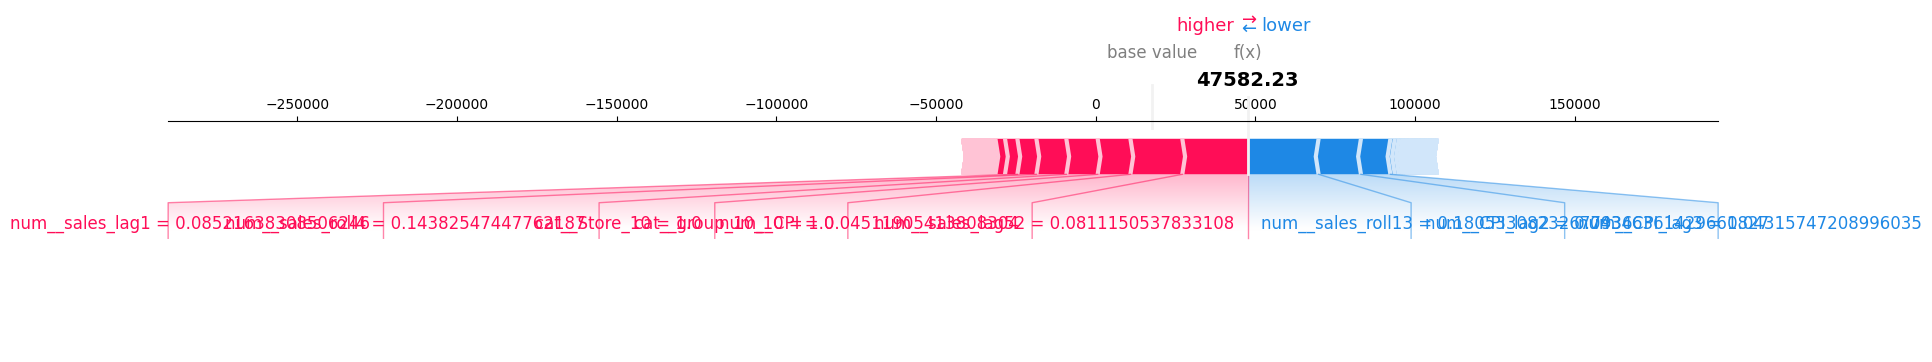

<Figure size 640x480 with 0 Axes>

In [99]:
idx = 50

X_one = X_val.iloc[[idx]]
X_one_proc = linreg.named_steps["prep"].transform(X_one)

linear_model = linreg.named_steps["model"]
feature_names = linreg.named_steps["prep"].get_feature_names_out()

import shap
explainer = shap.LinearExplainer(
    linear_model,
    linreg.named_steps["prep"].transform(X_train),
    feature_names=feature_names
)

shap_value_one = explainer(X_one_proc)
shap.plots.force(
    shap_value_one[0],
    matplotlib=True
)
plt.savefig(
    "figures/linear_local_shap.png",
    dpi=300,
    bbox_inches="tight"
)
plt.show()
plt.close()


## Elastic Net

In [51]:
from sklearn.linear_model import ElasticNet
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Elastic Net baseline
elastic = Pipeline([
    ("prep", preprocessor),
    ("model", ElasticNet(alpha=0.1, l1_ratio=0.5, max_iter=1000, random_state=42))
])

# Fit model
elastic.fit(X_train, y_train)

# Predict
y_pred = elastic.predict(X_val)

# Evaluation metrics
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
mse  = mean_squared_error(y_val, y_pred)
r2   = r2_score(y_val, y_pred)
amse = np.mean((y_val - y_pred) ** 2)

# Print results (same style as your baseline)
print("=== ELASTIC NET BASELINE ===")
print("RMSE:", rmse)
print("MSE :", mse)
print("AMSE:", amse)
print("R2  :", r2)


=== ELASTIC NET BASELINE ===
RMSE: 15510.929130672439
MSE : 240588922.49674287
AMSE: 240588922.49674287
R2  : 0.5092103805302484


True vs predict

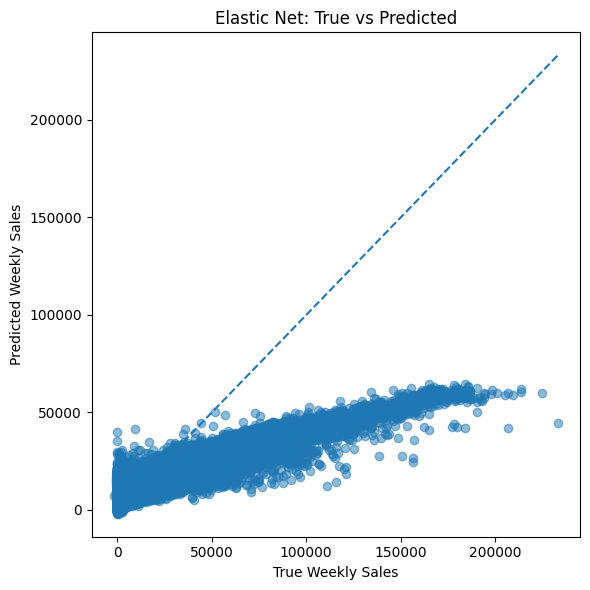

In [52]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
plt.scatter(y_val, y_pred, alpha=0.5)
plt.plot([y_val.min(), y_val.max()],
         [y_val.min(), y_val.max()],
         linestyle="--")
plt.xlabel("True Weekly Sales")
plt.ylabel("Predicted Weekly Sales")
plt.title("Elastic Net: True vs Predicted")
plt.tight_layout()
plt.show()


Global Feature importance (abs of cofficient)

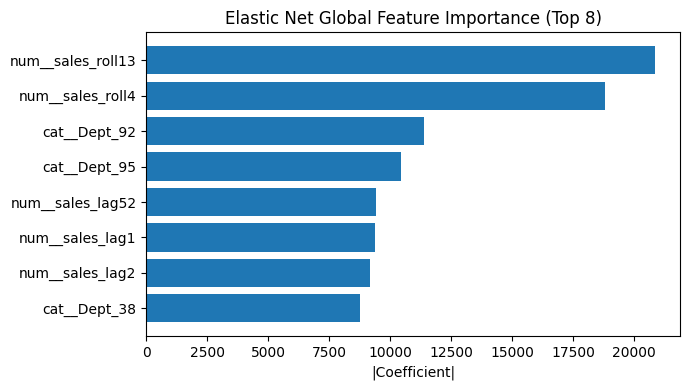

In [53]:
feature_names = elastic.named_steps["prep"].get_feature_names_out()
coefs = elastic.named_steps["model"].coef_
import pandas as pd

coef_df = pd.DataFrame({
    "feature": feature_names,
    "coef": coefs,
    "abs_coef": np.abs(coefs)
}).sort_values("abs_coef", ascending=False)

topk = 8
plt.figure(figsize=(7, 4))
plt.barh(coef_df["feature"].iloc[:topk][::-1],
         coef_df["abs_coef"].iloc[:topk][::-1])
plt.title("Elastic Net Global Feature Importance (Top 8)")
plt.xlabel("|Coefficient|")
plt.tight_layout()
plt.show()


Local feature importance

/usr/local/lib/python3.12/dist-packages/shap/explainers/_linear.py:99: FutureWarning: The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, maskers.Partition or maskers.Impute).
  warnings.warn(wmsg, FutureWarning)


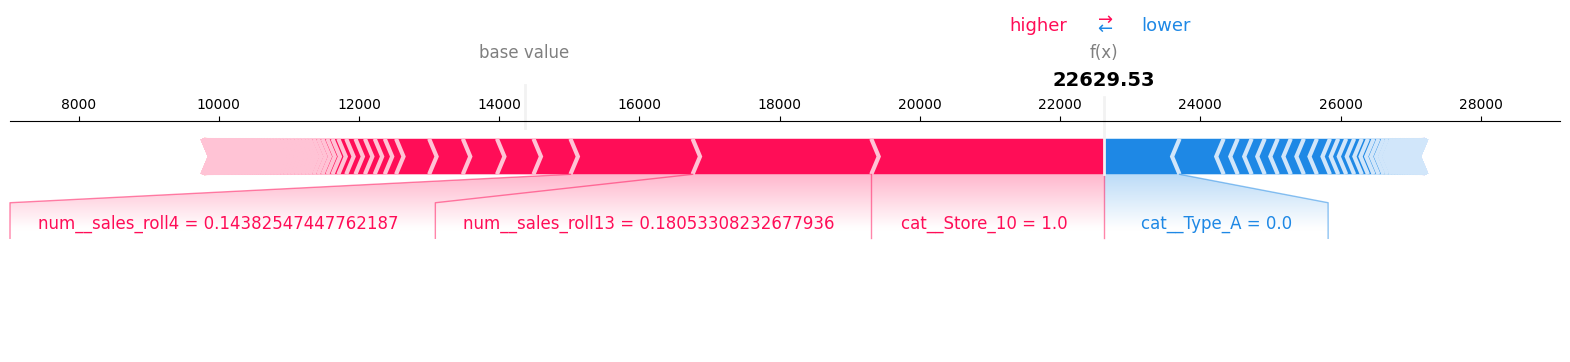

In [54]:
import shap


X_val_proc = elastic.named_steps["prep"].transform(X_val)


feature_names = elastic.named_steps["prep"].get_feature_names_out()

X_val_proc_df = pd.DataFrame(X_val_proc, columns=feature_names)


k = 50
x = X_val_proc_df.iloc[k]

x_single = X_val_proc_df.iloc[[k]]


background = shap.sample(X_val_proc_df, 200)


explainer = shap.LinearExplainer(
    elastic.named_steps["model"],
    background,
    feature_perturbation="interventional"
)


shap_value = explainer.shap_values(x_single)

shap.initjs()

shap.force_plot(
    explainer.expected_value,
    shap_value[0],
    x_single.iloc[0],
    matplotlib=True
)


## Random Forest+GridSearchCV

Random Forest GridSearch CV

In [64]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# -----------------------------
# 1. Preprocess (fit on subtrain only)
# -----------------------------
X_subtrain_proc = preprocessor.fit_transform(X_subtrain)
X_subval_proc   = preprocessor.transform(X_subval)

X_val_proc      = preprocessor.transform(X_val)   # full validation
param_grid = {
    "n_estimators": [400, 600],
    "max_depth": [16, 18],
    "min_samples_leaf": [5, 10],
    "min_samples_split": [10, 30],
    "max_features": [0.3, "sqrt"]
}

random_states = [0, 21]

results = []

for rs in random_states:

    rf = RandomForestRegressor(
        random_state=rs,
        n_jobs=2
    )

    grid = GridSearchCV(
        rf,
        param_grid=param_grid,
        cv=3,
        scoring="neg_root_mean_squared_error",
        n_jobs=2,
        verbose=1
    )

    grid.fit(X_subtrain_proc, y_subtrain)

    best_rf = grid.best_estimator_

    # evaluate on FULL validation set
    y_rf = best_rf.predict(X_val_proc)

    rmse = np.sqrt(mean_squared_error(y_val, y_rf))
    mse  = mean_squared_error(y_val, y_rf)
    amse = np.mean((y_val - y_rf) ** 2)
    r2   = r2_score(y_val, y_rf)

    results.append({
        "random_state": rs,
        "best_params": grid.best_params_,
        "RMSE": rmse,
        "MSE": mse,
        "AMSE": amse,
        "R2": r2
    })

    print(f"\n=== RANDOM STATE {rs} ===")
    print("Best params:", grid.best_params_)
    print("RMSE:", rmse)
    print("R2 :", r2)



Fitting 3 folds for each of 32 candidates, totalling 96 fits

=== RANDOM STATE 0 ===
Best params: {'max_depth': 18, 'max_features': 0.3, 'min_samples_leaf': 5, 'min_samples_split': 30, 'n_estimators': 400}
RMSE: 5571.287386132212
R2 : 0.9366814640895853
Fitting 3 folds for each of 32 candidates, totalling 96 fits

=== RANDOM STATE 21 ===
Best params: {'max_depth': 18, 'max_features': 0.3, 'min_samples_leaf': 5, 'min_samples_split': 30, 'n_estimators': 400}
RMSE: 5535.734739200878
R2 : 0.9374870081844313


Train final model with whole dataset

In [65]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np


X_train_proc = preprocessor.fit_transform(X_train)
X_val_proc   = preprocessor.transform(X_val)


rf = RandomForestRegressor(
    n_estimators=400,
    max_depth=18,
    min_samples_leaf=5,
    max_features=0.3,
    min_samples_split=30,
    n_jobs=2,
    random_state=42
)



rf.fit(X_train_proc, y_train)


y_rf = rf.predict(X_val_proc)

rmse_rf = np.sqrt(mean_squared_error(y_val, y_rf))
mse_rf  = mean_squared_error(y_val, y_rf)
r2_rf   = r2_score(y_val, y_rf)
amse_rf = np.mean((y_val - y_rf) ** 2)

print("\n=== RANDOM FOREST (no GridSearch) ===")
print("RMSE:", rmse_rf)
print("MSE :", mse_rf)
print("AMSE:", amse_rf)
print("R2  :", r2_rf)



=== RANDOM FOREST (no GridSearch) ===
RMSE: 4591.65873606742
MSE : 21083329.948504258
AMSE: 21083329.948504258
R2  : 0.9569910394244285


True vs Predicted

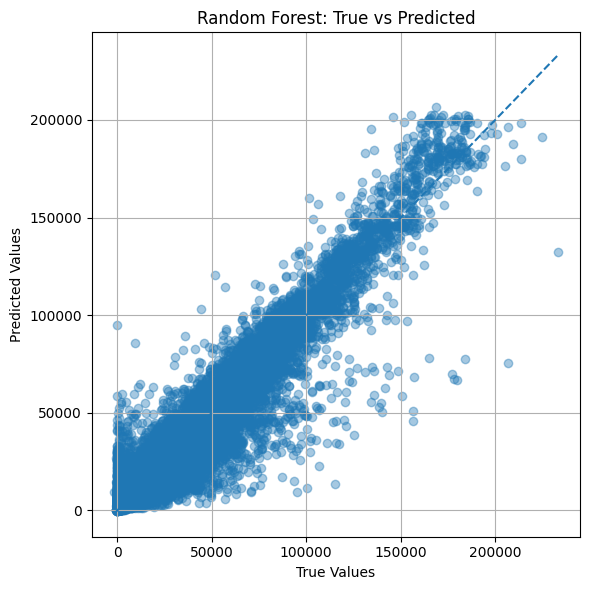

In [80]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
plt.scatter(y_val, y_rf, alpha=0.4)
plt.plot([y_val.min(), y_val.max()],
         [y_val.min(), y_val.max()],
         linestyle="--")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("Random Forest: True vs Predicted")
plt.grid(True)
plt.tight_layout()
plt.savefig(
    "figures/randomforest_scatter.png",
    dpi=300,
    bbox_inches="tight"
)
plt.show()
plt.close()




Global Feature Importance（Random Forest）

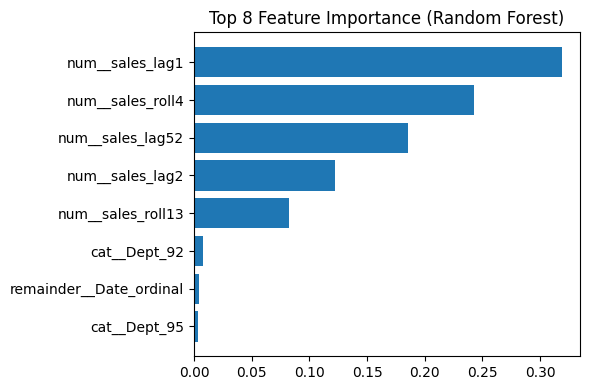

,feature,importance
3488,num__sales_lag1,0.318706
3491,num__sales_roll4,0.242781
3490,num__sales_lag52,0.185443
3489,num__sales_lag2,0.122273
3492,num__sales_roll13,0.082303
118,cat__Dept_92,0.008079
3495,remainder__Date_ordinal,0.003984
121,cat__Dept_95,0.003902


In [86]:
import pandas as pd
import numpy as np


feature_names = preprocessor.get_feature_names_out()

# Random Forest
importances = rf.feature_importances_

#  Top 8
fi_df = pd.DataFrame({
    "feature": feature_names,
    "importance": importances
}).sort_values(by="importance", ascending=False).head(8)

#
plt.figure(figsize=(6, 4))
plt.barh(fi_df["feature"], fi_df["importance"])
plt.gca().invert_yaxis()
plt.title("Top 8 Feature Importance (Random Forest)")
plt.tight_layout()
plt.savefig(
    "figures/randomforest_global.png",
    dpi=300,
    bbox_inches="tight"
)

plt.close()

plt.show()

fi_df


Gloabl Feature importance(Shap Value(subset))

In [69]:
# subset
X_shap = X_val_proc[:500] if X_val_proc.shape[0] > 500 else X_val_proc

explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_shap)


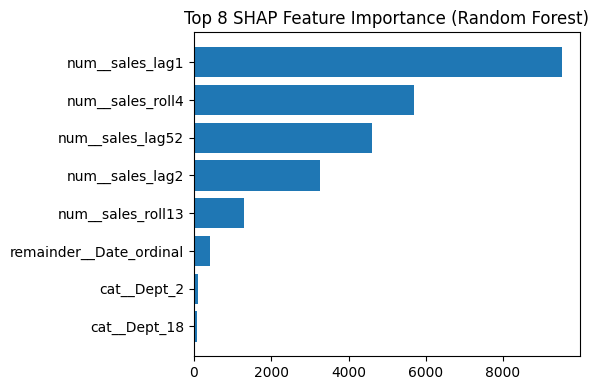

,feature,mean_abs_shap
3488,num__sales_lag1,9515.995687
3491,num__sales_roll4,5697.509668
3490,num__sales_lag52,4620.936030
3489,num__sales_lag2,3259.092143
3492,num__sales_roll13,1305.233205
3495,remainder__Date_ordinal,415.913697
46,cat__Dept_2,92.553644
61,cat__Dept_18,82.057086


In [84]:

mean_abs_shap = np.abs(shap_values).mean(axis=0)

shap_df = pd.DataFrame({
    "feature": feature_names,
    "mean_abs_shap": mean_abs_shap
}).sort_values(by="mean_abs_shap", ascending=False).head(8)

plt.figure(figsize=(6, 4))
plt.barh(shap_df["feature"], shap_df["mean_abs_shap"])
plt.gca().invert_yaxis()
plt.title("Top 8 SHAP Feature Importance (Random Forest)")
plt.tight_layout()
plt.savefig(
    "figures/randomforest_global_shap.png",
    dpi=300,
    bbox_inches="tight"
)
plt.show()
plt.close()



shap_df


In [ ]:
print(y_val.iloc[50])


53530.41


Local feature importance

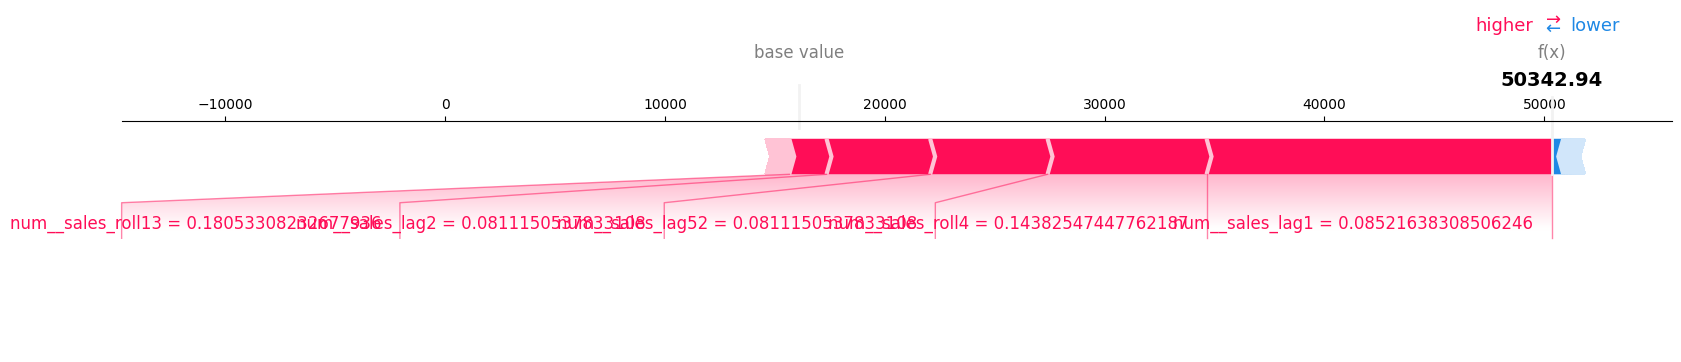

In [88]:
idx = 50

shap.force_plot(
    explainer.expected_value,
    shap_values[idx],
    X_shap[idx],
    feature_names=feature_names,
    matplotlib=True
)


In [89]:
plt.savefig(
    "figures/randomforest_local_shap.png",
    dpi=300,
    bbox_inches="tight"
)

plt.close()


## XGBoost+GridSearch CV


In [100]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# fit ONLY on subtrain
X_subtrain_proc = preprocessor.fit_transform(X_subtrain)
X_subval_proc   = preprocessor.transform(X_subval)

# full validation (for final evaluation only)
X_val_proc      = preprocessor.transform(X_val)
param_grid = {
    "max_depth": [5,8],
    "learning_rate": [0.02, 0.05],
    "subsample": [0.6, 0.8],
    "colsample_bytree": [0.8, 1.0],
    "reg_lambda": [1,2],
    "reg_alpha": [0, 0.1]
}


In [101]:
random_states = [0, 21]

results = []

for rs in random_states:

    xgb = XGBRegressor(
        objective="reg:squarederror",
        eval_metric="rmse",
        tree_method="hist",
        n_estimators=5000,          # large, rely on early stopping
        early_stopping_rounds=100,
        random_state=rs,
        n_jobs=4
    )

    grid = GridSearchCV(
        xgb,
        param_grid=param_grid,
        cv=3,
        scoring="neg_root_mean_squared_error",
        n_jobs=2,
        verbose=1
    )


    grid.fit(
        X_subtrain_proc, y_subtrain,
        eval_set=[(X_subval_proc, y_subval)],
        verbose=False
    )

    best_xgb = grid.best_estimator_

    # -----------------------------
    # Evaluate on FULL validation set
    # -----------------------------
    y_xgb = best_xgb.predict(X_val_proc)

    rmse = np.sqrt(mean_squared_error(y_val, y_xgb))
    r2   = r2_score(y_val, y_xgb)

    results.append({
        "random_state": rs,
        "best_params": grid.best_params_,
        "best_iteration": best_xgb.best_iteration,
        "RMSE": rmse,
        "R2": r2
    })

    print(f"\n=== RANDOM STATE {rs} ===")
    print("Best params     :", grid.best_params_)
    print("Best iteration :", best_xgb.best_iteration)
    print("RMSE:", rmse)
    print("R2  :", r2)


Fitting 3 folds for each of 64 candidates, totalling 192 fits

=== RANDOM STATE 0 ===
Best params     : {'colsample_bytree': 0.8, 'learning_rate': 0.02, 'max_depth': 5, 'reg_alpha': 0.1, 'reg_lambda': 2, 'subsample': 0.6}
Best iteration : 135
RMSE: 5359.757730764412
R2  : 0.9413983208726764
Fitting 3 folds for each of 64 candidates, totalling 192 fits

=== RANDOM STATE 21 ===
Best params     : {'colsample_bytree': 1.0, 'learning_rate': 0.05, 'max_depth': 8, 'reg_alpha': 0, 'reg_lambda': 2, 'subsample': 0.6}
Best iteration : 50
RMSE: 5744.603993482692
R2  : 0.9326806470552579


Simple XGBoost- final hyperparameter

In [104]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np


preprocessor.fit(X_train)
X_train_proc = preprocessor.transform(X_train)
X_val_proc   = preprocessor.transform(X_val)


xgb = XGBRegressor(
    objective="reg:squarederror",
    eval_metric="rmse",
    random_state=42,
    n_jobs=4,
    tree_method="hist",


    max_depth=5,
    learning_rate=0.02,
    n_estimators=5000,
    subsample=0.6,
    colsample_bytree=0.8,
    reg_alpha=0.1,
    reg_lambda=2,



    early_stopping_rounds=100
)


xgb.fit(
    X_train_proc, y_train,
    eval_set=[(X_val_proc, y_val)],
    verbose=False
)


y_xgb = xgb.predict(X_val_proc)


rmse = np.sqrt(mean_squared_error(y_val, y_xgb))
r2   = r2_score(y_val, y_xgb)

print("\n=== XGBOOST (EARLY STOPPING IN CONSTRUCTOR) ===")
print("Best iteration:", xgb.best_iteration)
print("Best score    :", xgb.best_score)
print("RMSE:", rmse)
print("R2  :", r2)



=== XGBOOST (EARLY STOPPING IN CONSTRUCTOR) ===
Best iteration: 140
Best score    : 4879.454070720067
RMSE: 4879.45406613001
R2  : 0.9514306591615636


True Vs Prediction

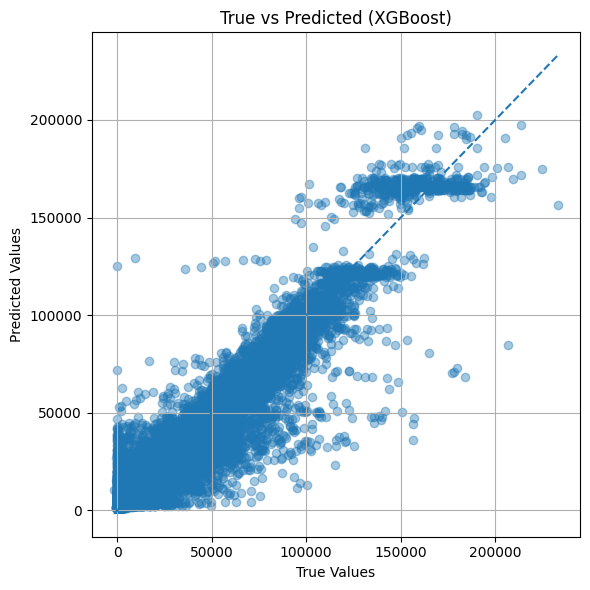

In [105]:
import matplotlib.pyplot as plt

# True vs Predicted scatter
plt.figure(figsize=(6, 6))
plt.scatter(y_val, y_xgb, alpha=0.4)
plt.plot([y_val.min(), y_val.max()],
         [y_val.min(), y_val.max()],
         linestyle='--')
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("True vs Predicted (XGBoost)")
plt.grid(True)
plt.tight_layout()
plt.savefig(
    "figures/xgboost_scatter.png",
    dpi=300,
    bbox_inches="tight"
)
plt.show()
plt.close()


Global feature importance（XGBoost）

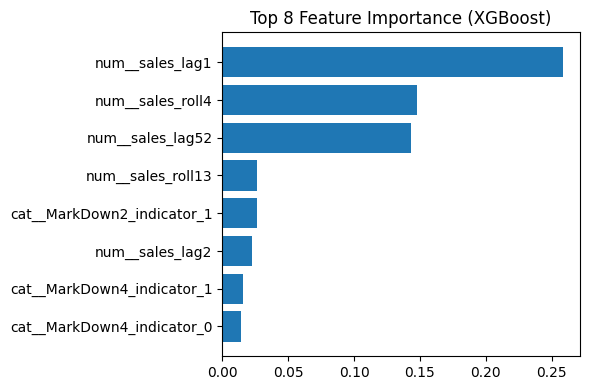

In [106]:
import pandas as pd
import matplotlib.pyplot as plt


feature_names = preprocessor.get_feature_names_out()


importances = xgb.feature_importances_

# Top 8
fi_df = pd.DataFrame({
    "feature": feature_names,
    "importance": importances
}).sort_values(by="importance", ascending=False).head(8)


plt.figure(figsize=(6, 4))
plt.barh(fi_df["feature"], fi_df["importance"])
plt.gca().invert_yaxis()
plt.title("Top 8 Feature Importance (XGBoost)")
plt.tight_layout()
plt.savefig(
    "figures/xgboost_global.png",
    dpi=300,
    bbox_inches="tight"
)
plt.show()
plt.close()

plt.show()



SHAP Global importance

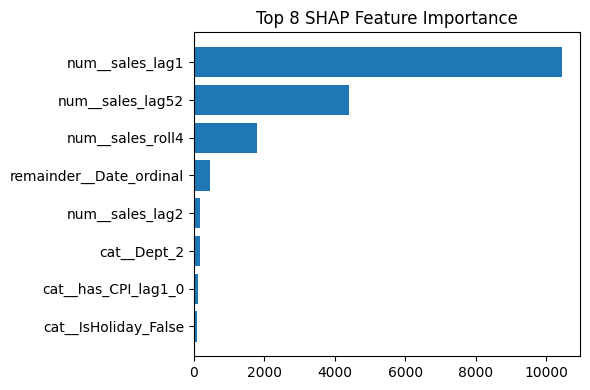

In [107]:
import shap
import numpy as np

explainer = shap.TreeExplainer(xgb)

X_shap = X_val_proc[:1000] if X_val_proc.shape[0] > 1000 else X_val_proc
shap_values = explainer.shap_values(X_shap)

# mean(|SHAP|)
mean_abs_shap = np.abs(shap_values).mean(axis=0)

shap_df = pd.DataFrame({
    "feature": feature_names,
    "mean_abs_shap": mean_abs_shap
}).sort_values(by="mean_abs_shap", ascending=False).head(8)

plt.figure(figsize=(6, 4))
plt.barh(shap_df["feature"], shap_df["mean_abs_shap"])
plt.gca().invert_yaxis()
plt.title("Top 8 SHAP Feature Importance")
plt.tight_layout()
plt.savefig(
    "figures/xgboost_globalshap.png",
    dpi=300,
    bbox_inches="tight"
)
plt.show()
plt.close()

plt.show()


Local Feature importance

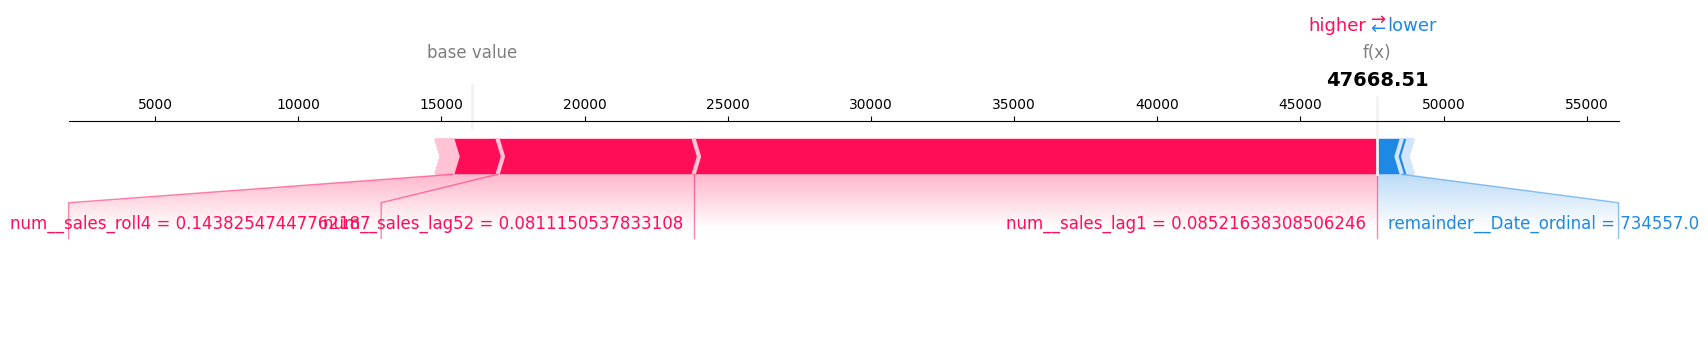

<Figure size 640x480 with 0 Axes>

In [108]:
idx = 50

shap.force_plot(
    explainer.expected_value,
    shap_values[idx],
    X_shap[idx],
    feature_names=feature_names,
    matplotlib=True
)
plt.savefig(
    "figures/xgboost_force.png",
    dpi=300,
    bbox_inches="tight"
)
plt.show()
plt.close()


In [112]:
import joblib

model = joblib.load("results/linear_regression_model.pkl")

type(model)


sklearn.pipeline.Pipeline

In [113]:
model


/usr/local/lib/python3.12/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('prep',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Store', 'Dept', 'IsHoliday',
                                                   'Type', 'group',
                                                   'MarkDown1_indicator',
                                                   'MarkDown2_indicator',
                                                   'MarkDown3_indicator',
                                                   'MarkDown4_indicator',
                                                   'MarkDown5_indicator',
                                                   'MarkDown1_cat_No',
                                                   'MarkDown1_cat_Yes',
                                                   'MarkDown2_c...
                                                   'has_sales_lag2',
                                                   'has_sales_lag52',
                                                   'has_temp_lag1', ...]),
                                                 ('num', MinMaxScaler(),
                                                  ['Size', 'Temperature',
                                                   'Fuel_Price', 'CPI',
                                                   'Unemployment', 'CPI_lag1',
                                                   'CPI_lag2', 'CPI_lag3',
                                                   'Unemployment_lag1',
                                                   'Unemployment_lag2',
                                                   'Unemployment_lag3',
                                                   'sales_lag1', 'sales_lag2',
                                                   'sales_lag52', 'sales_roll4',
                                                   'sales_roll13', 'temp_lag1',
                                                   'temp_lag52'])])),
                ('model', LinearRegression())])